In [4]:
import os
import numpy as np
import face_recognition
from PIL import Image, ImageDraw
import PIL.ImageOps
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from pkg_resources import resource_filename
from goprocam import GoProCamera
from goprocam import constants

In [5]:
def draw_rec():
    
    image_url = 'img.JPG'
    # This is an example of running face recognition on a single image
    # and drawing a box around each person that was identified.
    gpCam = GoProCamera.GoPro()
    gpCam.downloadLastMedia(gpCam.take_photo(1), image_url) #10 second timelapse. 
    # Load pictures and learn how to recognize it.
    images_encodings = [face_recognition.face_encodings(face_recognition.load_image_file('known/' + url))[0] for url in os.listdir('known')]

    known_face_names = [name.replace('.png', '') for name in os.listdir('known')]

    # Load an image with an unknown face
    unknown_image = face_recognition.load_image_file(image_url)

    # Find all the faces and face encodings in the unknown image
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    # Convert the image to a PIL-format image so that we can draw on top of it with the Pillow library
    # See http://pillow.readthedocs.io/ for more about PIL/Pillow
    pil_image = Image.fromarray(unknown_image)
    # Create a Pillow ImageDraw Draw instance to draw with
    draw = ImageDraw.Draw(pil_image)

    # Loop through each face found in the unknown image
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(images_encodings, face_encoding)

        name = "Unknown"

        # If a match was found in known_face_encodings, just use the first one.
        if True in matches:
            first_match_index = matches.index(True)
            name = known_face_names[first_match_index]
            print("I recognized", name)

        # Draw a box around the face using the Pillow module
        draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

        # Draw a label with a name below the face
        text_width, text_height = draw.textsize(name)
        draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
        draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))


    # Remove the drawing library from memory as per the Pillow docs
    del draw

    # Display the resulting image
    plt.imshow(pil_image, aspect='auto')

    # You can also save a copy of the new image to disk if you want by uncommenting this line
    # pil_image.save("image_with_boxes.jpg")

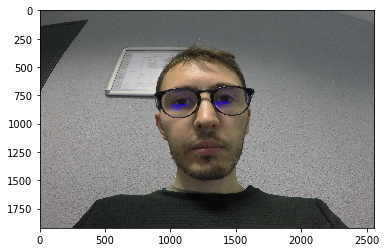

In [6]:
plt.imshow(Image.fromarray(face_recognition.load_image_file("known/louis.png")), aspect='auto')

HERO4 Silver
HD4.01.05.00.00
Camera successfully connected!
{}

{}

filename: GOPR9154.JPG
I recognized louis


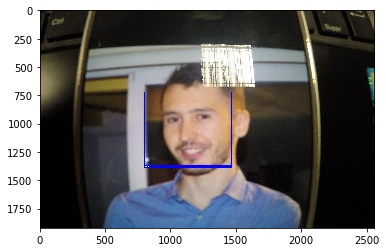

In [11]:
draw_rec()